# PART A LINK SUBMISSION HERE - Google Docs
https://docs.google.com/document/d/11TD6UbdBGXgfR6d7mfKndAF1ip2ik2nAH2D9upuJm-w/edit?tab=t.0

## Members:
* Lana Houri Homsi 202300443
* Ibrahim Seblini 202306845
* Walid Zubdeh 202302117

## 1. Import the dataset and perform data preprocessing (handle missing data, normalization):

In [6]:
import numpy as np 
import pandas as pd
df=pd.read_excel('Dataset.xlsx')
df.head()

,age,bmi,charges,smoker
0,25,18.5,16884.9,1
1,45,24.0,1725.6,0
2,35,28.0,4449.4,0
3,50,22.5,21984.5,1
4,23,30.1,3866.9,0


In [7]:
df.shape

(10, 4)

In [8]:
print(df.isnull().sum())

age        0
bmi        0
charges    0
smoker     0
dtype: int64


we can see that there isn't any missing values 

**Normalization:**

In [10]:
for column in df.columns:
    max_value= df[column].max()
    if max_value!=0:
      df[column]=df[column]/max_value
print(df.describe())

             age        bmi    charges     smoker
count  10.000000  10.000000  10.000000  10.000000
mean    0.661667   0.809302   0.403748   0.400000
std     0.209209   0.139273   0.301531   0.516398
min     0.383333   0.614618   0.078492   0.000000
25%     0.525000   0.685216   0.182516   0.000000
50%     0.625000   0.813953   0.283268   0.000000
75%     0.812500   0.917774   0.550035   1.000000
max     1.000000   1.000000   1.000000   1.000000


## 2. Build a neural network using TensorFlow and Keras:
* Define the input layer with the correct number of features.
* Add at least two hidden layers with ReLU activation functiona.
* Define the output layer with an appropriate activation function (e.g., Sigmoid for binary classification).

In [12]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │           220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

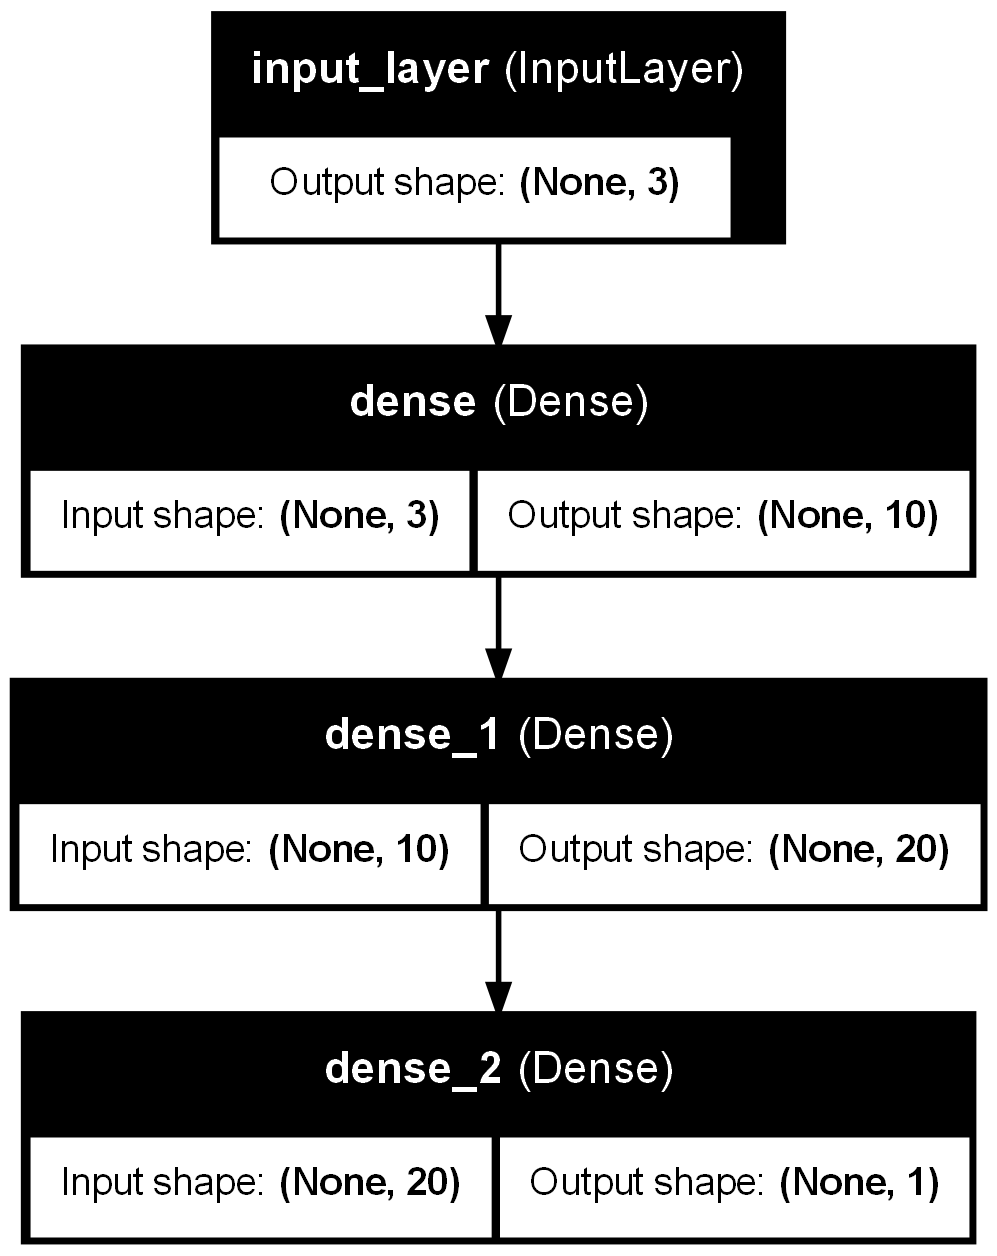

In [1]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense

# Define input
visible = Input(shape=(3,)) # Each row in our dataset has 4 attributes (age, bmi, charges, smoker)

# Connect hidden layers
layer1 = Dense(10, activation='relu')(visible)
layer2 = Dense(20, activation='relu')(layer1)

# Connect output layer
layer3 = Dense(1, activation='sigmoid')(layer2)

# Create model
model = Model(inputs=visible, outputs=layer3)

# Summary
model.summary()

# Plot graph
plot_model(model, to_file='multilayer_perceptron_graph.png',  show_shapes=True, show_layer_names=True)

## 3. Train the neural network:
* Use an optimizer such as Adam and a suitable loss function (e.g., binary crossentropy)
* Split the data into training and testing sets.
* Use the fit() method to train the model and monitor performance.

In [32]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Split the data into training and testing sets
X = df.drop(columns='smoker')
Y = df['smoker']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Fit the model on the training set
history = model.fit(X_train, Y_train, epochs=20, batch_size=10)

# Make predictions on the test set
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step - accuracy: 0.5000 - loss: 0.6798
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5000 - loss: 0.6776
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5000 - loss: 0.6754
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5000 - loss: 0.6733
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5000 - loss: 0.6711
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6250 - loss: 0.6689
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6250 - loss: 0.6667
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7500 - loss: 0.6644
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7500 - loss: 0.6620
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7500 - loss: 0.6596
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8750 - loss: 0.6572
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8750 - loss: 0.6548


## 4. Evaluate the model:
* Evaluate the model on the test data.
* Report the accuracy, loss, and confusion matrix.

## 5. Optimize the model:
* Experiment with different hyperparameters such as learning rate, batch size, and epochs.
* Apply regularization techniques (e.g., dropout) if needed to avoid overfitting.